## Observations and Insights 

#1 There is a postitive correlation between the weight of the mice and the tumor size. The P-Value of .84 indicates this linear correlation. Therefore, we might want to keep the mice on a healthy diet and provide exercise to help them decrease tumor size.
#2 Capomulin seems to be an effective drug regimen to treat the cancer. The tumor size in mouse l509 decreased as time went on.
#3 Of the 4 drug regimens we analyized, Capomulin and Ramicane were the most effective at decreasing tumor size. The least effective were the other two drugs Infubinol and Ceftamin. Therefore, I would recommend we do further studies or advance the two effective drugs to the next stage of trials.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
merge_df.shape

(1893, 8)

In [3]:
# Checking the number of mice.
count_mice = merge_df['Mouse ID'].value_counts().count()
count_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df_mouse_id = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'],keep='last')]
df_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF = merge_df[merge_df.duplicated('Mouse ID')]
duplicateRowsDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_unique = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
df_drop_sameID = merge_df.drop_duplicates(subset=['Mouse ID'], keep='last')

In [9]:
# Checking the number of mice in the clean DataFrame.
print(df_unique.shape)
print(df_drop_sameID.shape)

(1888, 8)
(249, 8)


## Summary Statistics

In [10]:
df_unique['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Ramicane_df = df_unique.loc['Ramicane':'Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
# Ramicane_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Ramicane_sr = df_unique.loc[df_unique['Drug Regimen']=='Ramicane','Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']) 
Capomulin_sr = df_unique.loc[df_unique['Drug Regimen']=='Capomulin','Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Infubinol_sr= df_unique.loc[df_unique['Drug Regimen']=='Infubinol','Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Placebo_sr= df_unique.loc[df_unique['Drug Regimen']=='Placebo','Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Ceftamin_sr= df_unique.loc[df_unique['Drug Regimen']=='Ceftamin','Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Stelasyn_sr= df_unique.loc[df_unique['Drug Regimen']=='Stelasyn','Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Zoniferol_sr= df_unique.loc[df_unique['Drug Regimen']=='Zoniferol','Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Ketapril_sr= df_unique.loc[df_unique['Drug Regimen']=='Ketapril','Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Propriva_sr= df_unique.loc[df_unique['Drug Regimen']=='Propriva','Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Naftisol_sr= df_unique.loc[df_unique['Drug Regimen']=='Naftisol','Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']) 
summary_df_1 = pd.concat([Ramicane_sr,Capomulin_sr,Infubinol_sr,Placebo_sr,Ceftamin_sr,Stelasyn_sr,Zoniferol_sr,Ketapril_sr,Propriva_sr,Naftisol_sr], axis=1)
summary_df_1.columns = ['Ramicane','Capomulin','Infubinol','Placebo','Ceftamin','Stelasyn','Zoniferol','Ketapril','Propriva','Naftisol']
summary_df_1

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
mean,40.216745,40.675741,52.884795,54.033581,52.591172,54.233149,53.236507,55.235638,52.382993,54.331565
median,40.673236,41.557809,51.820584,52.288934,51.776157,52.431737,51.818479,53.698743,50.783528,52.509285
var,23.486704,24.947764,43.128684,61.168083,39.290177,59.450562,48.533355,68.553577,43.220205,66.173479
std,4.846308,4.994774,6.567243,7.821003,6.268188,7.710419,6.966589,8.279709,6.574208,8.134708
sem,0.320955,0.329346,0.492236,0.581331,0.469821,0.573111,0.516398,0.603860,0.526358,0.596466


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_df_2 = df_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_df_3 = summary_df_2.T
summary_df_3.columns = ['Ramicane','Capomulin','Infubinol','Placebo','Ceftamin','Stelasyn','Zoniferol','Ketapril','Propriva','Naftisol']
summary_df_3

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.382993,40.216745,54.233149,53.236507
median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.783528,40.673236,52.431737,51.818479
var,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.220205,23.486704,59.450562,48.533355
std,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.574208,4.846308,7.710419,6.966589
sem,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.526358,0.320955,0.573111,0.516398


## Bar and Pie Charts

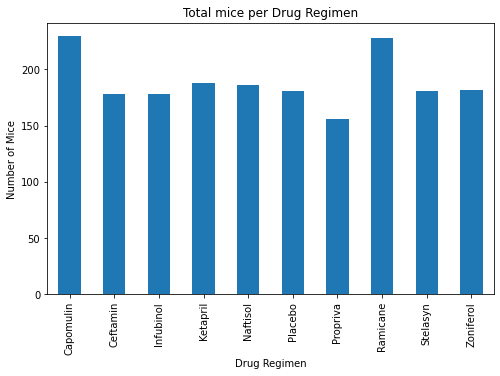

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_pertreat = df_unique.groupby('Drug Regimen')['Mouse ID'].count()

mouse_pertreat.plot(kind = 'bar',figsize = (8,5))
plt.title("Total mice per Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()




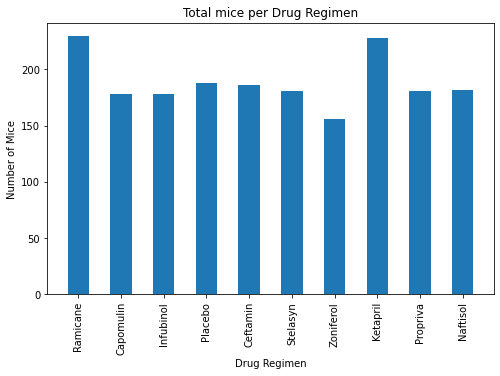

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = ['Ramicane','Capomulin','Infubinol','Placebo','Ceftamin','Stelasyn','Zoniferol','Ketapril','Propriva','Naftisol']
y_axis = df_unique.groupby('Drug Regimen')['Mouse ID'].count().tolist()
plt.figure(figsize=(8, 5))
plt.bar(x_axis, y_axis, align="center",width= 0.5)
plt.xticks(rotation=90)
plt.title("Total mice per Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()





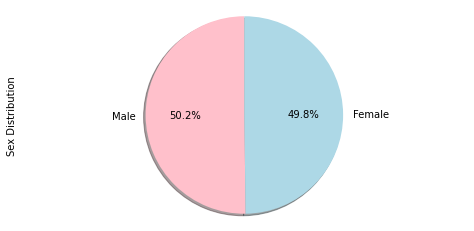

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Labels for the sections of our pie chart
labels = ["Male","Female"]

# The colors of each section of the pie chart
colors = ["pink", "lightBlue"]

mouse_pertreat = df_drop_sameID['Sex'].value_counts()
mouse_pertreat
mouse_pertreat.plot(kind = 'pie',  figsize = (8,4), labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True, startangle=90 , ylabel = 'Sex Distribution')
plt.axis("equal")
plt.show()

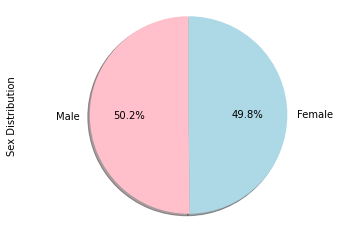

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male","Female"]

# The colors of each section of the pie chart
colors = ["pink", "lightBlue"]

# The values of each section of the pie chart
size = df_drop_sameID['Sex'].value_counts().tolist()
plt.pie(size, labels=labels, colors=colors,
autopct="%1.1f%%",shadow=True, startangle=90)
plt.axis("equal")
plt.ylabel('Sex Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_volumn = df_drop_sameID.loc[df_drop_sameID["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
Ramicane_volumn = df_drop_sameID.loc[df_drop_sameID["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
Infubinol_volumn = df_drop_sameID.loc[df_drop_sameID["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
Ceftamin_volumn = df_drop_sameID.loc[df_drop_sameID["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
final_volumn_table = pd.concat([Capomulin_volumn,Ramicane_volumn,Infubinol_volumn,Ceftamin_volumn], axis=1)
final_volumn_table.columns = ['Capomulin_volumn','Ramicane_volumn','Infubinol_volumn','Ceftamin_volumn']
final_volumn_table

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_volumn = pd.concat( [df_unique , final_volumn_table], axis =1)
pd.set_option('display.max_rows', None)

last_volumn.head(30)

# last_volumn = pd.merge (df_unique, final_volumn_table , on= ('Mouse ID','Timepoint'), how='right')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Capomulin_volumn,Ramicane_volumn,Infubinol_volumn,Ceftamin_volumn
0,k403,Ramicane,Male,21,16,0,45.000000,0,NaN,NaN,NaN,NaN
1,k403,Ramicane,Male,21,16,5,38.825898,0,NaN,NaN,NaN,NaN
2,k403,Ramicane,Male,21,16,10,35.014271,1,NaN,NaN,NaN,NaN
3,k403,Ramicane,Male,21,16,15,34.223992,1,NaN,NaN,NaN,NaN
4,k403,Ramicane,Male,21,16,20,32.997729,1,NaN,NaN,NaN,NaN
5,k403,Ramicane,Male,21,16,25,33.464577,1,NaN,NaN,NaN,NaN
6,k403,Ramicane,Male,21,16,30,31.099498,1,NaN,NaN,NaN,NaN
7,k403,Ramicane,Male,21,16,35,26.546993,1,NaN,NaN,NaN,NaN
8,k403,Ramicane,Male,21,16,40,24.365505,1,NaN,NaN,NaN,NaN
9,k403,Ramicane,Male,21,16,45,22.050126,1,NaN,22.050126,NaN,NaN


In [54]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Create list to fill with tumor vol data (for plotting)
list_Capomulin = Capomulin_volumn.tolist()
list_Ramicane = Ramicane_volumn.tolist()
list_Infubinol = Infubinol_volumn.tolist()
list_Ceftamin = Ceftamin_volumn.tolist()




#calculations of quartile, quantile, etc for each of the drugs
# Calculate the IQR and quantitatively determine if there are any potential outliers.
print ('---------------------------------------------------------------------------------------')
quart_cap = Capomulin_volumn.quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)

outlier_cap = Capomulin_volumn.loc[(Capomulin_volumn < lowb_cap) | (Capomulin_volumn > upb_cap)]
number_outliers =len(outlier_cap)

print(f'Capomulin lower quantile : {low_cap}')
print(f'Capomulin upper quantile : {up_cap}')
print(f'Capomulin lower bound : {lowb_cap}')
print(f'Capomulin upper bound : {upb_cap}')
print(f'Capmulin has {number_outliers} outliers')
print(f'Capomulin outlier : {outlier_cap}')

print ('---------------------------------------------------------------------------------------')

quart_ram = Ramicane_volumn.quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)

outlier_ram = Ramicane_volumn.loc[(Ramicane_volumn < lowb_ram) | (Ramicane_volumn > upb_ram)]
number_outliers =len(outlier_ram)

print(f'Ramicane lower quantile : {low_ram}')
print(f'Ramicane upper quantile : {up_ram}')
print(f'Ramicane lower bound : {lowb_ram}')
print(f'Ramicane upper bound : {upb_ram}')
print(f'Ramicane has {number_outliers} outliers')
print(f'Ramicane outlier : {outlier_ram}')

print ('---------------------------------------------------------------------------------------')
quart_inf = Infubinol_volumn.quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)


outlier_inf = Infubinol_volumn.loc[(Infubinol_volumn < lowb_inf) | (Infubinol_volumn > upb_inf)]
number_outliers =len(outlier_inf)

print(f'Infubinol lower quantile : {low_inf}')
print(f'Infubinol upper quantile : {up_inf}')
print(f'Infubinol lower bound : {lowb_inf}')
print(f'Infubinol upper bound : {upb_inf}')
print(f'Infubinol has {number_outliers} outliers')
print(f'Infubinol outlier : {outlier_inf}')

print ('---------------------------------------------------------------------------------------')

quart_cef = Ceftamin_volumn.quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)

outlier_cef = Ceftamin_volumn.loc[(Ceftamin_volumn < lowb_cef) | (Infubinol_volumn > upb_cef)]
number_outliers =len(outlier_cef)
print(f'Ceftamin lower quantile : {low_cef}')
print(f'Ceftamin upper quantile : {up_cef}')
print(f'Ceftamin lower bound : {lowb_cef}')
print(f'Ceftamin upper bound : {upb_cef}')
print(f'Ceftamin has {number_outliers} outliers')
print(f'Ceftamin outlier : {outlier_cef}')

print ('---------------------------------------------------------------------------------------')
    

---------------------------------------------------------------------------------------
Capomulin lower quantile : 32.37735684
Capomulin upper quantile : 40.1592203
Capomulin lower bound : 20.70456164999999
Capomulin upper bound : 51.83201549
Capmulin has 0 outliers
Capomulin outlier : Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------------------------------------------------
Ramicane lower quantile : 31.56046955
Ramicane upper quantile : 40.65900627
Ramicane lower bound : 17.912664470000003
Ramicane upper bound : 54.30681135
Ramicane has 0 outliers
Ramicane outlier : Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------------------------------------------------
Infubinol lower quantile : 54.04860769
Infubinol upper quantile : 65.52574285
Infubinol lower bound : 36.83290494999999
Infubinol upper bound : 82.74144559000001
Infubinol has 1 outliers
Infubinol outlier : 669    36.321346
Name: Tumor

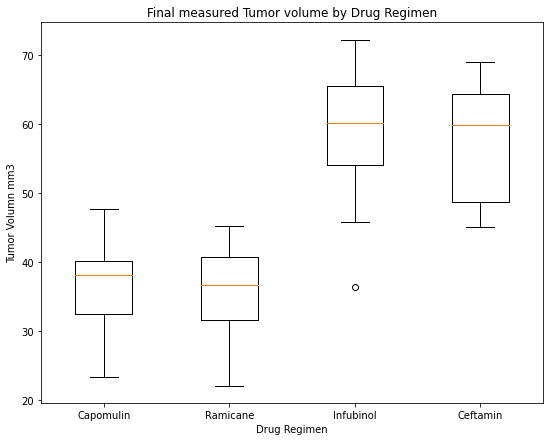

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_list = [list_Capomulin, list_Ramicane, list_Infubinol, list_Ceftamin]
fig1, ax1 = plt.subplots(figsize=(9,7))
ax1.set_title('Final measured Tumor volume by Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volumn mm3')
ax1.boxplot(data_list)
plt.xticks([1,2,3,4], drugs_treatment)
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

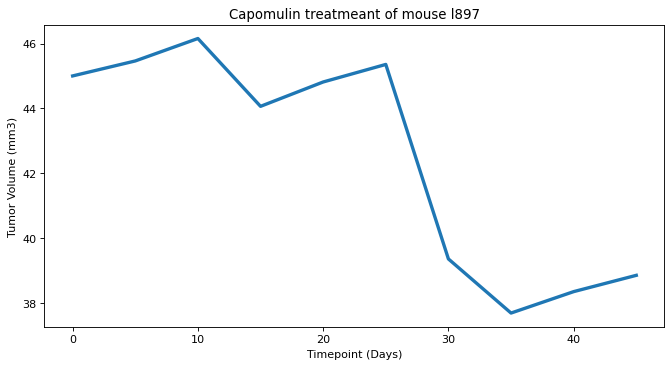

In [97]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# mouse selected l897
mousel897_df = df_unique.loc[df_unique["Mouse ID"] == "l897",:]
x_axis_cap = mousel897_df['Timepoint']
y_axis_cap = mousel897_df['Tumor Volume (mm3)']
plt.figure(figsize=(10, 5), dpi=80)
time_volumn, = plt.plot(x_axis_cap,y_axis_cap , linewidth=3)

plt.title('Capomulin treatmeant of mouse l897') 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('linechart')
plt.show()


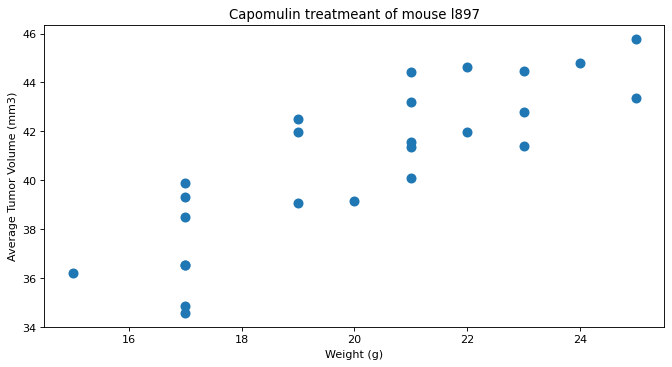

In [122]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
base_cap = df_unique.loc[df_unique["Drug Regimen"] == "Capomulin"]
Mouse_group = base_cap.groupby('Mouse ID').mean()

plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(Mouse_group['Weight (g)'],Mouse_group['Tumor Volume (mm3)'] , linewidth=3)
plt.title("Weight vs Tumor Volume (mm3) - Capomulin")
plt.title('Capomulin treatmeant of mouse l897') 
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


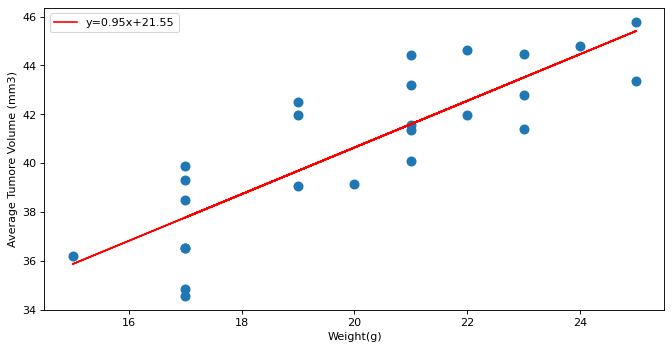

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(Mouse_group['Weight (g)'],Mouse_group['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

x_values = Mouse_group['Weight (g)']

y_values = Mouse_group['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(x_values,y_values ,linewidth=3)
plt.plot(x_values,regress_values,"r-" , label='y={:.2f}x+{:.2f}'.format(slope,intercept) )

plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.legend()
plt.savefig('linearregression')
plt.show()
